# Managing Big Data for Connected Devices

## 420-N63-NA

## Kawser Wazed Nafi
 ----------------------------------------------------------------------------------------------------------------------------------

# Linear Regression

In this we'll make use of the California Housing data set.

The data contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). In this sample a block group on average includes 1425.5 individuals living in a geographically compact area.

These spatial data contain 20,640 observations on housing prices with 9 economic variables:

#### Longitude
refers to the angular distance of a geographic place north or south of the earth’s equator for each block group

#### Latitude 
refers to the angular distance of a geographic place east or west of the earth’s equator for each block group

#### Housing Median Age
is the median age of the people that belong to a block group. Note that the median is the value that lies at the midpoint of a frequency distribution of observed values
#### Total Rooms
is the total number of rooms in the houses per block group

#### Total Bedrooms
is the total number of bedrooms in the houses per block group

#### Population
is the number of inhabitants of a block group

#### Households
refers to units of houses and their occupants per block group

#### Median Income
is used to register the median income of people that belong to a block group

#### Median House Value
is the dependent variable and refers to the median house value per block group

In [1]:
# Install dependent libraries
!pip install mllib
!pip install pandas
!pip install numpy

### Library Import

In [32]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 3.4 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.1 MB 6.1 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 6.3 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.1 MB 5.7 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.1 MB 5.4 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 5.5 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 5.4 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 5.3 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 4.8 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.1 MB 4.7 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 4.6 MB/s eta 0:00:01
   -

Exception ignored in: <function JavaModelWrapper.__del__ at 0x0000016B933A4860>
Traceback (most recent call last):
  File "c:\Users\hiche\Desktop\Spark\venv\Lib\site-packages\pyspark\mllib\common.py", line 152, in __del__
    assert self._sc._gateway is not None
           ^^^^^^^^
AttributeError: 'RegressionMetrics' object has no attribute '_sc'
Exception ignored in: <function JavaModelWrapper.__del__ at 0x0000016B933A4860>
Traceback (most recent call last):
  File "c:\Users\hiche\Desktop\Spark\venv\Lib\site-packages\pyspark\mllib\common.py", line 152, in __del__
    assert self._sc._gateway is not None
           ^^^^^^^^
AttributeError: 'RegressionMetrics' object has no attribute '_sc'
Exception ignored in: <function JavaModelWrapper.__del__ at 0x0000016B933A4860>
Traceback (most recent call last):
  File "c:\Users\hiche\Desktop\Spark\venv\Lib\site-packages\pyspark\mllib\common.py", line 152, in __del__
    assert self._sc._gateway is not None
           ^^^^^^^^
AttributeError: 'Re

LinearRegression()

Root Mean Squared Error (RMSE): 5796.28
Mean Absolute Error (MAE): 4181.19
R² Score: 0.78


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='charges'>

Text(0.5, 0, 'Actual Charges')

Text(0, 0.5, 'Predicted Charges')

Text(0.5, 1.0, 'Actual vs. Predicted Insurance Charges')

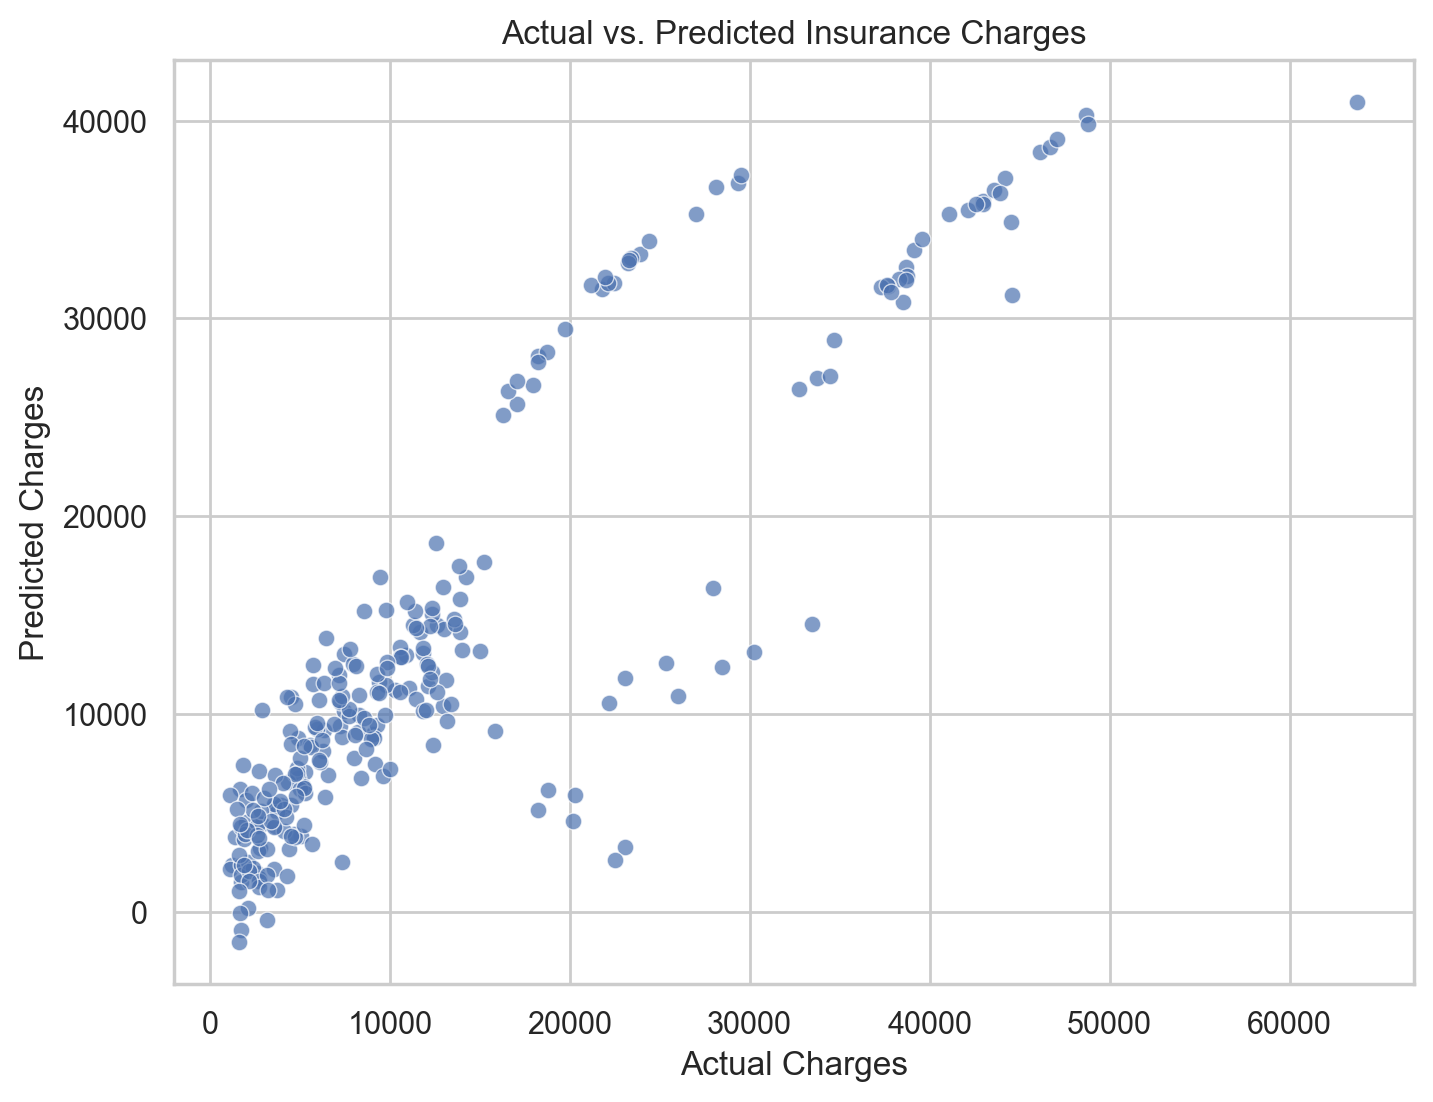

In [33]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv("insurance.csv")

# Convert categorical variables into numerical using one-hot encoding
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

# Select features (numerical + encoded categorical) and target
X = df.drop(columns=["charges"])  # Features
y = df["charges"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualizing Predictions vs Actual Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.show()

### Spark Session Creation with SparkSQL

In [3]:
# Spark Session Creation

ss = SparkSession.builder.master("local[4]").appName("Linear-Regression").getOrCreate()
sc = ss.sparkContext
sqlContext = SQLContext(sc)

# Load data from file into dataframe
HOUSING_DATA = 'input/cal_housing.data'
# define the schema, corresponding to a line in the csv data file.
schema = StructType([
    StructField("long", FloatType(), nullable=True),
    StructField("lat", FloatType(), nullable=True),
    StructField("medage", FloatType(), nullable=True),
    StructField("totrooms", FloatType(), nullable=True),
    StructField("totbdrms", FloatType(), nullable=True),
    StructField("pop", FloatType(), nullable=True),
    StructField("houshlds", FloatType(), nullable=True),
    StructField("medinc", FloatType(), nullable=True),
    StructField("medhv", FloatType(), nullable=True)]
)
# Load housing data
housing_df = ss.read.csv(path=HOUSING_DATA, schema=schema).cache()

# Inspect first five rows
housing_df.take(5)

c:\Users\hiche\Desktop\Spark\venv\Lib\site-packages\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


[Row(long=-122.2300033569336, lat=37.880001068115234, medage=41.0, totrooms=880.0, totbdrms=129.0, pop=322.0, houshlds=126.0, medinc=8.325200080871582, medhv=452600.0),
 Row(long=-122.22000122070312, lat=37.86000061035156, medage=21.0, totrooms=7099.0, totbdrms=1106.0, pop=2401.0, houshlds=1138.0, medinc=8.301400184631348, medhv=358500.0),
 Row(long=-122.23999786376953, lat=37.849998474121094, medage=52.0, totrooms=1467.0, totbdrms=190.0, pop=496.0, houshlds=177.0, medinc=7.257400035858154, medhv=352100.0),
 Row(long=-122.25, lat=37.849998474121094, medage=52.0, totrooms=1274.0, totbdrms=235.0, pop=558.0, houshlds=219.0, medinc=5.643099784851074, medhv=341300.0),
 Row(long=-122.25, lat=37.849998474121094, medage=52.0, totrooms=1627.0, totbdrms=280.0, pop=565.0, houshlds=259.0, medinc=3.8461999893188477, medhv=342200.0)]

### Loaded Data View

In [4]:
# show the dataframe columns
housing_df.columns

# show the schema of the dataframe
housing_df.printSchema()

# run a sample selection
housing_df.select('pop','totbdrms').show(10)

# group by housingmedianage and see the distribution
result_df = housing_df.groupBy("medage").count().sort("medage", ascending=False)

result_df.show(10)

['long',
 'lat',
 'medage',
 'totrooms',
 'totbdrms',
 'pop',
 'houshlds',
 'medinc',
 'medhv']

root
 |-- long: float (nullable = true)
 |-- lat: float (nullable = true)
 |-- medage: float (nullable = true)
 |-- totrooms: float (nullable = true)
 |-- totbdrms: float (nullable = true)
 |-- pop: float (nullable = true)
 |-- houshlds: float (nullable = true)
 |-- medinc: float (nullable = true)
 |-- medhv: float (nullable = true)

+------+--------+
|   pop|totbdrms|
+------+--------+
| 322.0|   129.0|
|2401.0|  1106.0|
| 496.0|   190.0|
| 558.0|   235.0|
| 565.0|   280.0|
| 413.0|   213.0|
|1094.0|   489.0|
|1157.0|   687.0|
|1206.0|   665.0|
|1551.0|   707.0|
+------+--------+
only showing top 10 rows

+------+-----+
|medage|count|
+------+-----+
|  52.0| 1273|
|  51.0|   48|
|  50.0|  136|
|  49.0|  134|
|  48.0|  177|
|  47.0|  198|
|  46.0|  245|
|  45.0|  294|
|  44.0|  356|
|  43.0|  353|
+------+-----+
only showing top 10 rows



### Plotting Median Age data with Bar Graph

<Axes: xlabel='medage'>

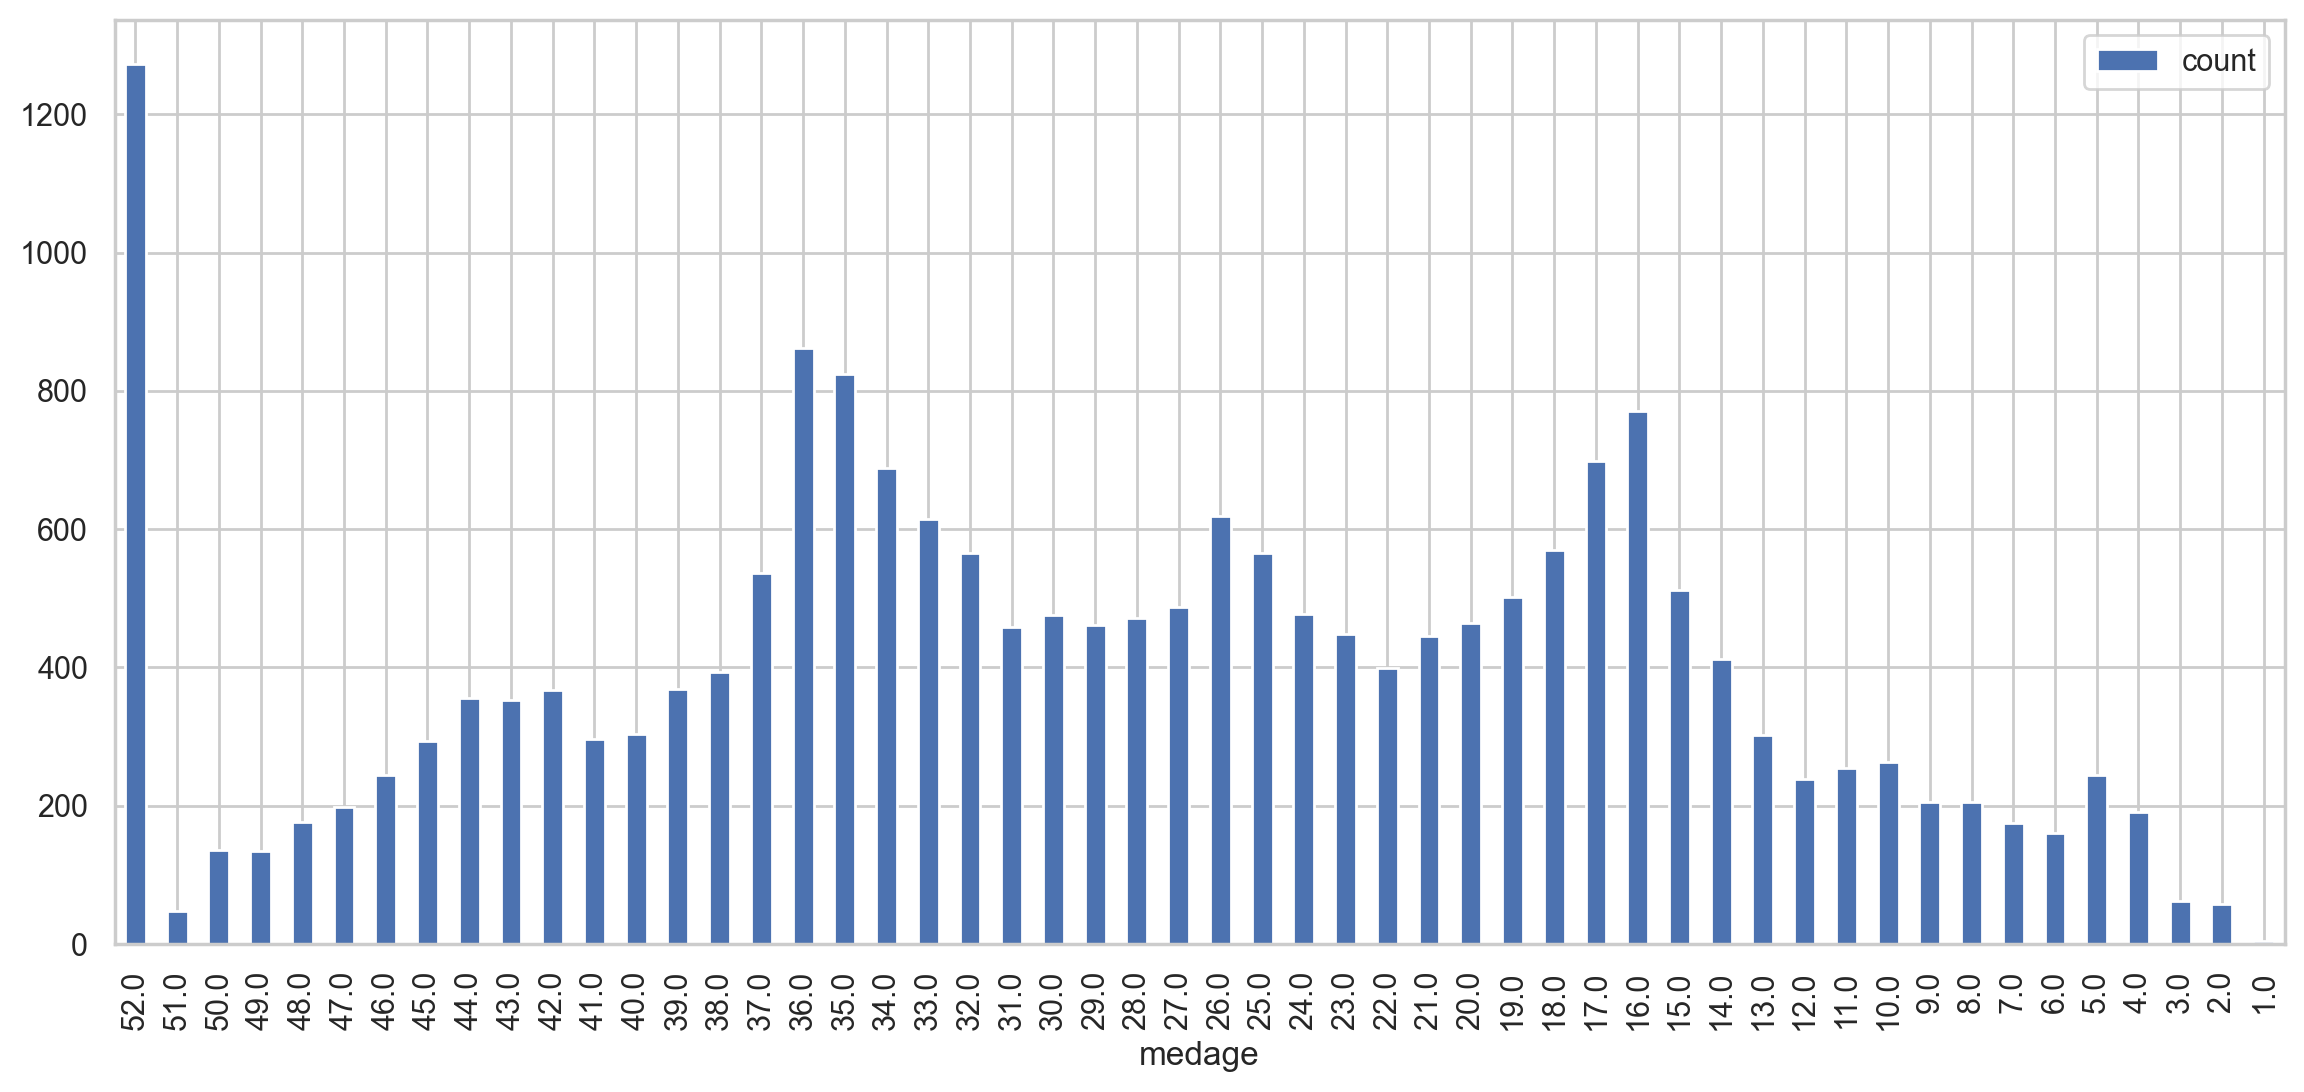

In [5]:
# plot the sample on a graph

result_df.toPandas().plot.bar(x='medage',figsize=(14, 6))

### Summary Statistics

Spark DataFrames include some built-in functions for statistical processing. The describe() function performs summary statistics calculations on all numeric columns and returns them as a DataFrame.

In [6]:
(housing_df.describe().select(
                    "summary",
                    F.round("medage", 4).alias("medage"),
                    F.round("totrooms", 4).alias("totrooms"),
                    F.round("totbdrms", 4).alias("totbdrms"),
                    F.round("pop", 4).alias("pop"),
                    F.round("houshlds", 4).alias("houshlds"),
                    F.round("medinc", 4).alias("medinc"),
                    F.round("medhv", 4).alias("medhv"))
                    .show())

+-------+-------+---------+--------+---------+--------+-------+-----------+
|summary| medage| totrooms|totbdrms|      pop|houshlds| medinc|      medhv|
+-------+-------+---------+--------+---------+--------+-------+-----------+
|  count|20640.0|  20640.0| 20640.0|  20640.0| 20640.0|20640.0|    20640.0|
|   mean|28.6395|2635.7631| 537.898|1425.4767|499.5397| 3.8707|206855.8169|
| stddev|12.5856|2181.6153|421.2479|1132.4621|382.3298| 1.8998|115395.6159|
|    min|    1.0|      2.0|     1.0|      3.0|     1.0| 0.4999|    14999.0|
|    max|   52.0|  39320.0|  6445.0|  35682.0|  6082.0|15.0001|   500001.0|
+-------+-------+---------+--------+---------+--------+-------+-----------+



Look at the minimum and maximum values of all the (numerical) attributes. We see that multiple attributes have a wide range of values: we will need to normalize your dataset.

### Data Preprocessing

With all this information that we gathered from our small exploratory data analysis, we know enough to preprocess our data to feed it to the model.

1. we shouldn't care about missing values; all zero values have been excluded from the data set.
2. We should probably standardize our data, as we have seen that the range of minimum and maximum values is quite big.
3. There are possibly some additional attributes that we could add, such as a feature that registers the number of bedrooms per room or the rooms per household.
4. Our dependent variable is also quite big; To make our life easier, we'll have to adjust the values slightly.

### Preprocessing The Target Values
First, let's start with the medianHouseValue, our dependent variable. To facilitate our working with the target values, we will express the house values in units of 100,000. That means that a target such as 452600.000000 should become 4.526:

In [7]:
# Adjust the values of `medianHouseValue`
housing_df = housing_df.withColumn("medhv", col("medhv")/100000)
housing_df.show(2)

+-------+-----+------+--------+--------+------+--------+------+-----+
|   long|  lat|medage|totrooms|totbdrms|   pop|houshlds|medinc|medhv|
+-------+-----+------+--------+--------+------+--------+------+-----+
|-122.23|37.88|  41.0|   880.0|   129.0| 322.0|   126.0|8.3252|4.526|
|-122.22|37.86|  21.0|  7099.0|  1106.0|2401.0|  1138.0|8.3014|3.585|
+-------+-----+------+--------+--------+------+--------+------+-----+
only showing top 2 rows



### Feature Engineering / Selection from Sample

Now that we have adjusted the values in medianHouseValue, we will now add the following columns to the data set:

1. Rooms per household which refers to the number of rooms in households per block group;
2. Population per household, which basically gives us an indication of how many people live in households per block group; And
3. Bedrooms per room which will give us an idea about how many rooms are bedrooms per block group;

As we're working with DataFrames, we can best use the select() method to select the columns that we're going to be working with, namely totalRooms, households, and population. Additionally, we have to indicate that we're working with columns by adding the col() function to our code. Otherwise, we won't be able to do element-wise operations like the division that we have in mind for these three variables:

In [8]:
housing_df.columns

# Add the new columns to `df`
housing_df = (housing_df.withColumn("rmsperhh", F.round(col("totrooms")/col("houshlds"), 2))
                       .withColumn("popperhh", F.round(col("pop")/col("houshlds"), 2))
                       .withColumn("bdrmsperrm", F.round(col("totbdrms")/col("totrooms"), 2)))

# Inspect the result
housing_df.show(5)

['long',
 'lat',
 'medage',
 'totrooms',
 'totbdrms',
 'pop',
 'houshlds',
 'medinc',
 'medhv']

+-------+-----+------+--------+--------+------+--------+------+-----+--------+--------+----------+
|   long|  lat|medage|totrooms|totbdrms|   pop|houshlds|medinc|medhv|rmsperhh|popperhh|bdrmsperrm|
+-------+-----+------+--------+--------+------+--------+------+-----+--------+--------+----------+
|-122.23|37.88|  41.0|   880.0|   129.0| 322.0|   126.0|8.3252|4.526|    6.98|    2.56|      0.15|
|-122.22|37.86|  21.0|  7099.0|  1106.0|2401.0|  1138.0|8.3014|3.585|    6.24|    2.11|      0.16|
|-122.24|37.85|  52.0|  1467.0|   190.0| 496.0|   177.0|7.2574|3.521|    8.29|     2.8|      0.13|
|-122.25|37.85|  52.0|  1274.0|   235.0| 558.0|   219.0|5.6431|3.413|    5.82|    2.55|      0.18|
|-122.25|37.85|  52.0|  1627.0|   280.0| 565.0|   259.0|3.8462|3.422|    6.28|    2.18|      0.17|
+-------+-----+------+--------+--------+------+--------+------+-----+--------+--------+----------+
only showing top 5 rows



We can see that, for the first row, there are about 6.98 rooms per household, the households in the block group consist of about 2.5 people and the amount of bedrooms is quite low with 0.14:

Since we don't want to necessarily standardize our target values, we'll want to make sure to isolate those in our data set. Note also that this is the time to leave out variables that we might not want to consider in our analysis. In this case, let's leave out variables such as longitude, latitude, housingMedianAge and totalRooms.

In this case, we will use the select() method and passing the column names in the order that is more appropriate. In this case, the target variable medianHouseValue is put first, so that it won't be affected by the standardization.

In [12]:
# Re-order and select columns
housing_df = housing_df.select("medhv", 
                               "medage",
                              "totbdrms", 
                              "pop", 
                              "houshlds", 
                              "medinc", 
                              "rmsperhh", 
                              "popperhh", 
                              "bdrmsperrm")

#### Feature Extraction

featureCols = ["totbdrms", "pop", "houshlds", "medinc", "rmsperhh", "popperhh", "bdrmsperrm", "medage"]

# Use a VectorAssembler to put features into a feature vector column:

# put features into a feature vector column
assembler = VectorAssembler(inputCols=featureCols, outputCol="features") 
assembled_df = assembler.transform(housing_df)
assembled_df.show(10, truncate=False)



+-----+------+--------+------+--------+------+--------+--------+----------+------------------------------------------------------------+
|medhv|medage|totbdrms|pop   |houshlds|medinc|rmsperhh|popperhh|bdrmsperrm|features                                                    |
+-----+------+--------+------+--------+------+--------+--------+----------+------------------------------------------------------------+
|4.526|41.0  |129.0   |322.0 |126.0   |8.3252|6.98    |2.56    |0.15      |[129.0,322.0,126.0,8.325200080871582,6.98,2.56,0.15,41.0]   |
|3.585|21.0  |1106.0  |2401.0|1138.0  |8.3014|6.24    |2.11    |0.16      |[1106.0,2401.0,1138.0,8.301400184631348,6.24,2.11,0.16,21.0]|
|3.521|52.0  |190.0   |496.0 |177.0   |7.2574|8.29    |2.8     |0.13      |[190.0,496.0,177.0,7.257400035858154,8.29,2.8,0.13,52.0]    |
|3.413|52.0  |235.0   |558.0 |219.0   |5.6431|5.82    |2.55    |0.18      |[235.0,558.0,219.0,5.643099784851074,5.82,2.55,0.18,52.0]   |
|3.422|52.0  |280.0   |565.0 |259.0   |3.

### Standarization

Next, we can finally scale the data using StandardScaler. The input columns are the features, and the output column with the rescaled that will be included in the scaled_df will be named "features_scaled":

In [13]:
# Initialize the `standardScaler`
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
# Fit the DataFrame to the scaler
scaled_df = standardScaler.fit(assembled_df).transform(assembled_df)
# Inspect the result
scaled_df.select("features", "features_scaled").show(10, truncate=False)

+------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                    |features_scaled                                                                                                                                          |
+------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+
|[129.0,322.0,126.0,8.325200080871582,6.98,2.56,0.15,41.0]   |[0.30623297630686513,0.2843362208866199,0.3295584480852433,4.38209543579743,2.8211223886115664,0.24648542140099877,2.5828740130262697,3.2577023016083064]|
|[1106.0,2401.0,1138.0,8.301400184631348,6.24,2.11,0.16,21.0]|[2.6255323394991694,2.1201592122632746,2.9764882057222772,4.3695679991

### Building The ML Model
#### Creating and ElasticNet 

ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of L1 and L2 using the l1_ratio parameter.

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

In [14]:
## Building the ML model

# Split the data into train and test sets
train_data, test_data = scaled_df.randomSplit([.8,.2], seed=rnd_seed)
train_data.columns

# Initialize `lr`
lr = (LinearRegression(featuresCol='features_scaled', labelCol="medhv", predictionCol='predmedhv', 
                               maxIter=10, regParam=0.3, elasticNetParam=0.8, standardization=False))
# Fit the data to the model
linearModel = lr.fit(train_data)



['medhv',
 'medage',
 'totbdrms',
 'pop',
 'houshlds',
 'medinc',
 'rmsperhh',
 'popperhh',
 'bdrmsperrm',
 'features',
 'features_scaled']

In [15]:
## Evaluating the model
# Coefficients for the model
linearModel.coefficients


DenseVector([0.0, 0.0, 0.0, 0.5293, 0.0, 0.0, 0.0, 0.0])

In [16]:
featureCols

['totbdrms',
 'pop',
 'houshlds',
 'medinc',
 'rmsperhh',
 'popperhh',
 'bdrmsperrm',
 'medage']

In [17]:
# Intercept for the model
linearModel.intercept

coeff_df = pd.DataFrame({"Feature": ["Intercept"] + featureCols, "Co-efficients": np.insert(linearModel.coefficients.toArray(), 0, linearModel.intercept)})
coeff_df = coeff_df[["Feature", "Co-efficients"]]

0.9939730178200581

In [18]:
coeff_df

,Feature,Co-efficients
0,Intercept,0.993973
1,totbdrms,0.000000
2,pop,0.000000
3,houshlds,0.000000
4,medinc,0.529268
5,rmsperhh,0.000000
6,popperhh,0.000000
7,bdrmsperrm,0.000000
8,medage,0.000000


### Generating Predictions

In [19]:
# Generate predictions

predictions = linearModel.transform(test_data)


# Extract the predictions and the "known" correct labels
predandlabels = predictions.select("medage", "predmedhv", "medhv")

predandlabels.show()


+------+------------------+-------+
|medage|         predmedhv|  medhv|
+------+------------------+-------+
|  16.0|1.4566243897688356|0.14999|
|  52.0|1.2145312774490895|  0.225|
|  52.0|1.2981355800828176|  0.225|
|  46.0| 1.605613327174062|  0.269|
|  22.0|1.5917675552433308|  0.344|
|  31.0|1.2861005664625962|  0.367|
|  10.0|1.4945681188009723|  0.375|
|  42.0|1.4238067035065887|  0.394|
|  36.0|1.5262714335000702|  0.398|
|  28.0|1.5674746204799597|  0.409|
|  27.0|1.3207012140155836|  0.417|
|  16.0|1.4553985976545207|  0.425|
|  52.0|1.1878703819884848|  0.425|
|  39.0|  1.43174648880927|   0.43|
|  40.0|1.2560409124575578|  0.436|
|  17.0|  1.32964391711995|   0.44|
|  42.0| 1.591098899095143|   0.44|
|  29.0|1.4288770193957463|  0.444|
|  32.0|1.3638824063687758|  0.445|
|  38.0| 1.518498828839585|  0.446|
+------+------------------+-------+
only showing top 20 rows



### Model Data Visualization

The model tried to predict the median house values (medhv) based on the data given. We are now going to visualize the trained predicted data and the actual data we fed in the model.

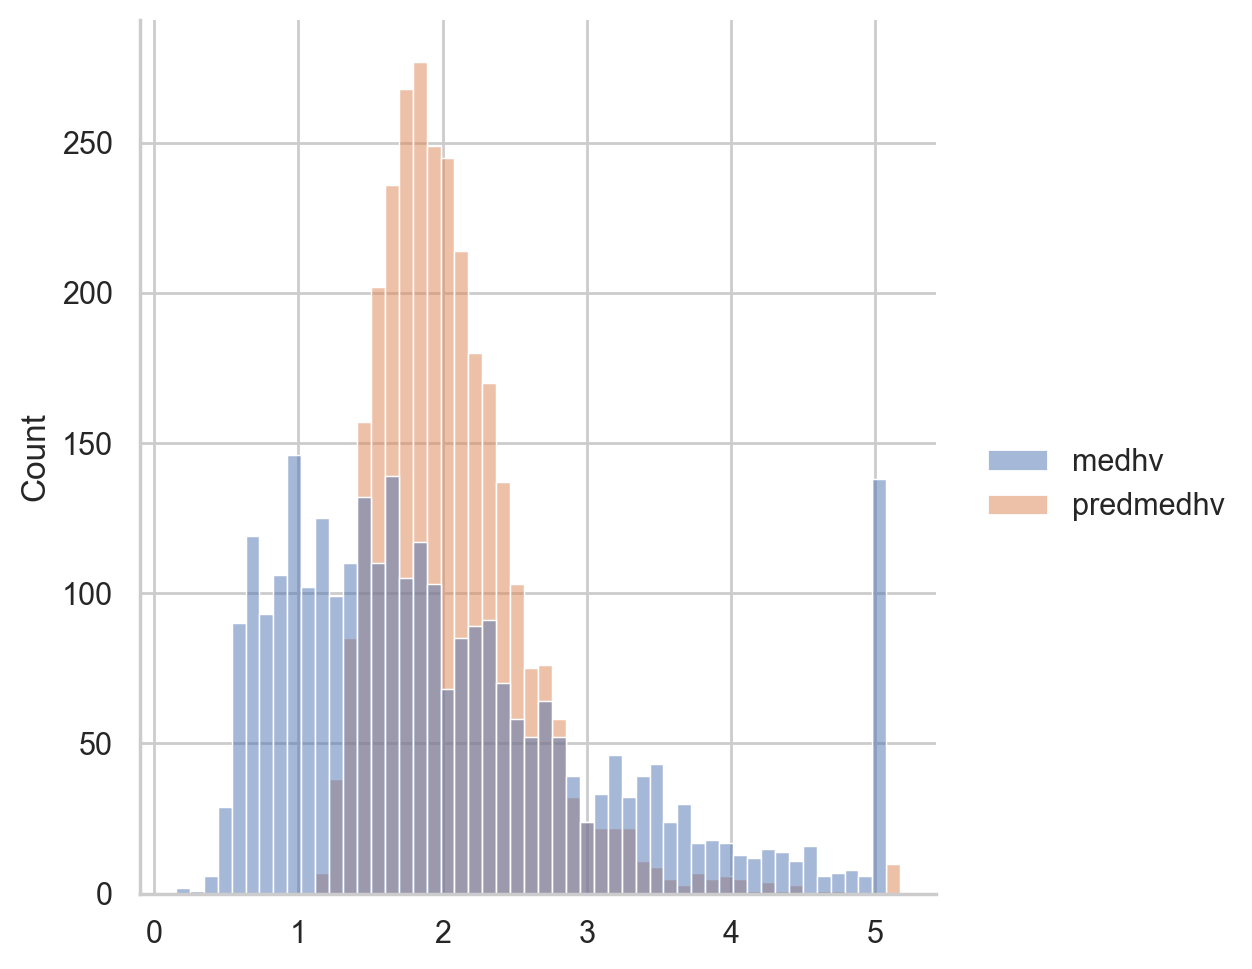

In [20]:
import seaborn as sns
medhv_df = predictions.select(['medhv', 'predmedhv']).sample(False, 0.7, 42)
medhv_pandas_df = medhv_df.toPandas()
sns.displot(medhv_pandas_df)

### Analysis of the Plot
#### Distribution Comparison:
The blue bars (medhv) represent the actual median house values.<br>
The orange bars (predmedhv) represent the predicted values from the model.<br>
The distributions have similar shapes but are slightly shifted.<br>
#### Model Performance Observation:
The predicted values are centered around a slightly lower range than the actual values.<br>
This may indicate underestimation by the model.<br>
The model captures the general pattern but may need fine-tuning for better accuracy.

<Axes: xlabel='medage', ylabel='medhv'>

<Axes: xlabel='medage', ylabel='medhv'>

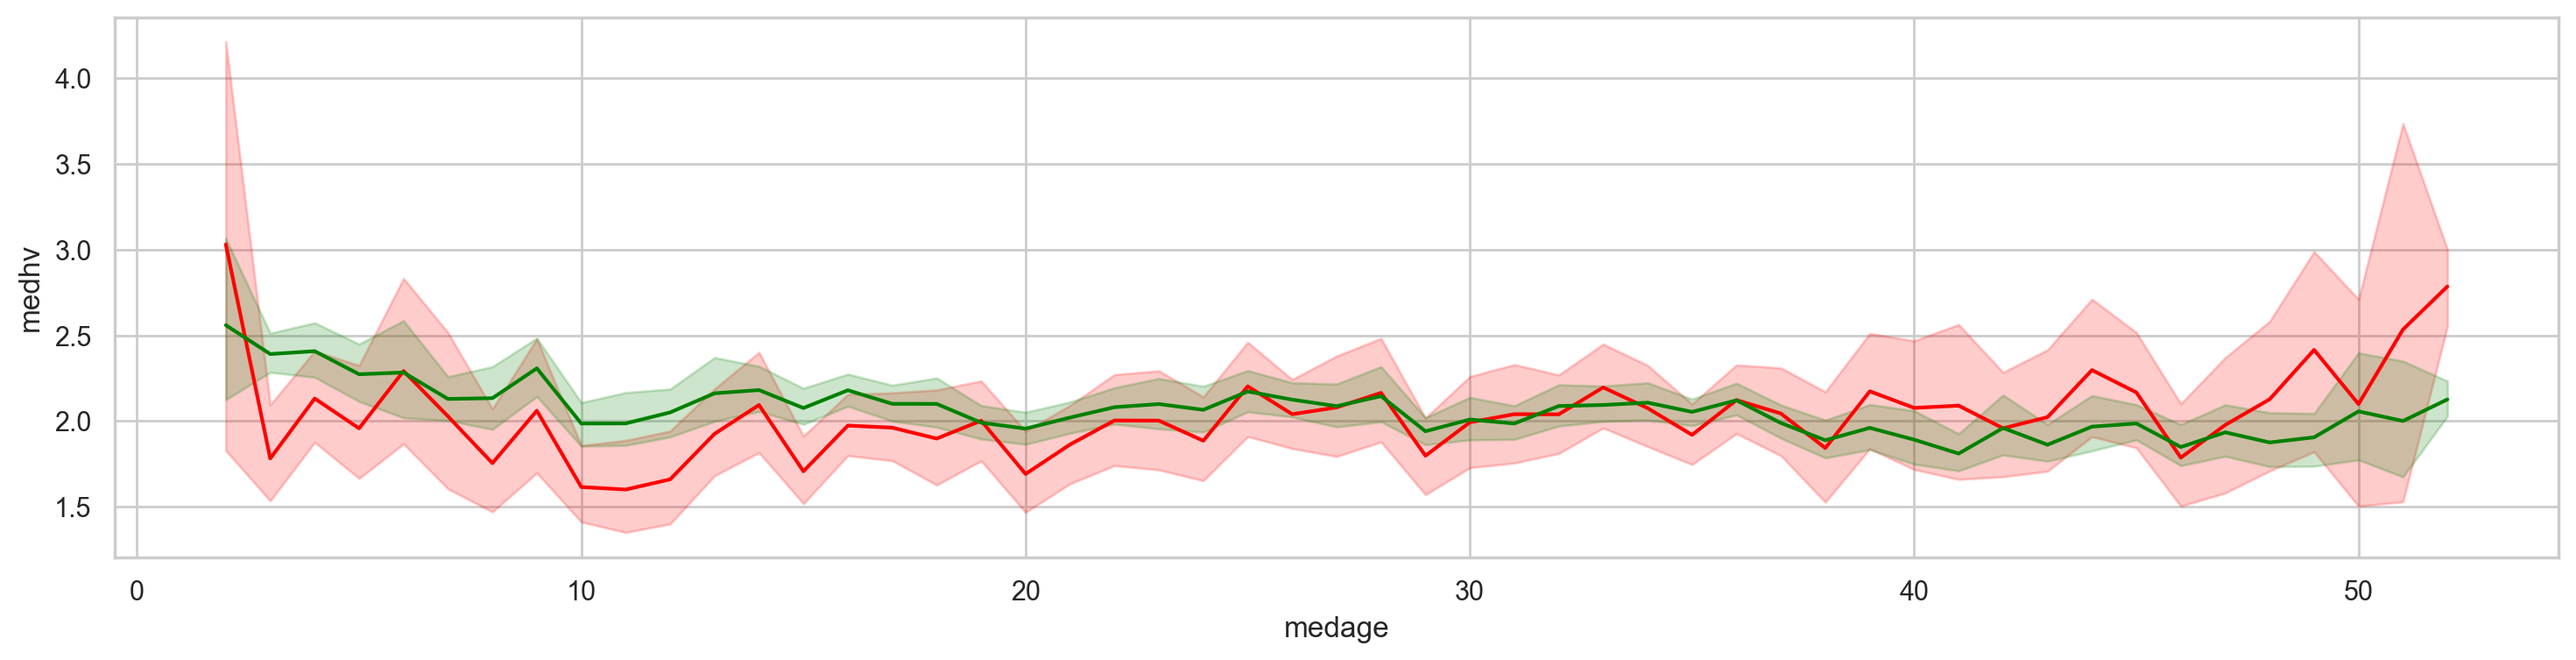

In [21]:
medhv2_df = predictions.select(['medage','medhv', 'predmedhv']).sample(False, 0.7, 42)
medhv2_pandas_df = medhv2_df.toPandas()
sns.lineplot(x="medage", y="medhv", data = medhv2_pandas_df, color="red")
sns.lineplot(x="medage", y="predmedhv", data = medhv2_pandas_df, color="green")

### Observations
#### Trend Similarity:

The red line represents actual median house values (medhv).<br>
The green line represents predicted median house values (predmedhv).<br>
The two lines follow a similar pattern, which indicates that the model is capturing the overall trend.<br>
#### Prediction Deviation (Shaded Areas):
The shaded regions indicate confidence intervals.<br>
The red area (actual values) has higher variance at certain points, especially at the start and end.<br>
The green area (predicted values) appears smoother, meaning the model has less variance in predictions.<br>
#### Potential Issues:
Underestimation at peaks: At some points (especially at high medage values), the predicted values seem to be<br> lower than actual values.<br>
Overestimation in lower variance regions: Some areas have the green line slightly above the red line.

### Evaluation of the ML model

#### RMSE (Root Mean Squared Error)

 The Root Mean Squared Error (RMSE) is one of the two main performance indicators for a regression model. It measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy).

 The lower the value of the Root Mean Squared Error, the better the model is. A perfect model (a hypothetic model that would always predict the exact expected value) would have a Root Mean Squared Error value of 0.

 The Root Mean Squared Error has the advantage of representing the amount of error in the same unit as the predicted column making it easy to interpret. If you are trying to predict an amount in dollars, then the Root Mean Squared Error can be interpreted as the amount of error in dollars.

#### MAE (Mean Absolute Error)
In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement.

In the context of machine learning, absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

## Explanation
When to Use Which?<br>
Use RMSE when you want to penalize large errors more heavily (e.g., in financial forecasting, where large <br>deviations are costly).<br>
Use MAE when you want a more balanced measure of accuracy (e.g., when you care about overall prediction <br>accuracy rather than large individual mistakes).

#### R2 - R Squared Metric
R-squared, also known as the coefficient of determination, is a statistical measure used in machine learning to evaluate the quality of a regression model. It measures how well the model fits the data by assessing the proportion of variance in the dependent variable explained by the independent variables.

R-squared indicates the percentage of variation in your target variable that can be explained by your independent variables. It measures how closely related each variable is to one another and how predictable each dependent variable is from its respective set of independent variables. 

The closer the R-squared value is to one, the better your model fits the data.

### Key Takeaways on R²
Definition: Measures how well the independent variables explain the variance in the dependent variable.<br>
Range: Values range from 0 to 1:<br>
R² = 1 → Perfect fit (all variance is explained)<br>
R² close to 0 → Poor fit (model does not explain much variance)<br>
Interpretation: Higher R² means a better model, but it doesn’t necessarily indicate correctness (overfitting<br> is possible).

In [22]:
# Get the RMSE (root mean square error)
print("RMSE: {0}".format(linearModel.summary.rootMeanSquaredError))

# Get Mean Average Error (MAE)
print("MAE: {0}".format(linearModel.summary.meanAbsoluteError))

# Get the R2 (R square error)
print("R2: {0}".format(linearModel.summary.r2))

RMSE: 0.878969772131949
MAE: 0.6755195682813134
R2: 0.4220577199800566


### Regression Evaluator from PySpark Package



In [ ]:
# .evaluate()
# This method is used to measure the performance of a machine learning model.

# .format()
# This method is used to insert values into a string dynamically.
# It replaces placeholders ({}) with actual values.
evaluator = RegressionEvaluator(predictionCol="predmedhv", labelCol='medhv', metricName='rmse')
print("RMSE: {0}".format(evaluator.evaluate(predandlabels)))

evaluator = RegressionEvaluator(predictionCol="predmedhv", labelCol='medhv', metricName='mae')
print("MAE: {0}".format(evaluator.evaluate(predandlabels)))

evaluator = RegressionEvaluator(predictionCol="predmedhv", labelCol='medhv', metricName='r2')
print("R2: {0}".format(evaluator.evaluate(predandlabels)))

RMSE: 0.8751096322709987
MAE: 0.6789520880603118
R2: 0.4153580431458296


#### Regression Metrics from MLLIB Package

In [27]:

# # mllib is old so the methods are available in rdd
# metrics = RegressionMetrics(predandlabels.rdd)

# print("RMSE: {0}".format(metrics.rootMeanSquaredError))

# print("MAE: {0}".format(metrics.meanAbsoluteError))

# print("R2: {0}".format(metrics.r2))

from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType

# Ensure the columns are in the correct format
predandlabels = predandlabels.withColumn("predmedhv", col("predmedhv").cast(DoubleType()))
predandlabels = predandlabels.withColumn("medhv", col("medhv").cast(DoubleType()))

# Convert DataFrame to RDD with only two columns (prediction, actual)
rdd_pred_labels = predandlabels.select("predmedhv", "medhv").rdd.map(lambda row: (row[0], row[1]))

# Verify the first few rows to confirm correct structure
print(rdd_pred_labels.take(5))  # This should print [(pred1, actual1), (pred2, actual2), ...]

# Initialize RegressionMetrics
metrics = RegressionMetrics(rdd_pred_labels)

# Print evaluation metrics
print("RMSE: {0}".format(metrics.rootMeanSquaredError))
print("MAE: {0}".format(metrics.meanAbsoluteError))
print("R2: {0}".format(metrics.r2))

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 35.0 failed 1 times, most recent failure: Lost task 0.0 in stage 35.0 (TID 28) (host.docker.internal executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1583)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:701)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:745)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:698)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:663)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:639)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:585)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:543)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 17 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:181)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1583)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:701)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:745)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:698)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:663)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:639)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:585)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:543)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 17 more


### What is a Regression Model?
A regression model is a type of machine learning model that predicts a continuous value based on input data. It finds the relationship between one or more independent variables (inputs) and a dependent variable (output).

## Exercise 1

Can you explain why do we need RMSE, MAE and R2? What is the purpose of using these metrics?

### ANSWER:
These metrics help us measure how good our regression model is at making predictions.

RMSE (Root Mean Squared Error) → Measures how far off predictions are, but penalizes larger errors more.
→ Use when big mistakes matter.

MAE (Mean Absolute Error) → Measures the average error size without favoring large or small errors.
→ Use for a simple, balanced error measure.

R² (R-Squared, Coefficient of Determination) → Tells us how well the model explains the data (closer to 1 is better).
→ Use to check overall model performance.

## Exercise 2

Can you plot the predicted dataframe on plot? Medage and count predicted plot will be enough to see.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='medage', ylabel='Count'>

Text(0.5, 0, 'Medage (Median Age of Houses)')

Text(0, 0.5, 'Count of Predictions')

Text(0.5, 1.0, 'Distribution of Predicted House Values by Median Age')

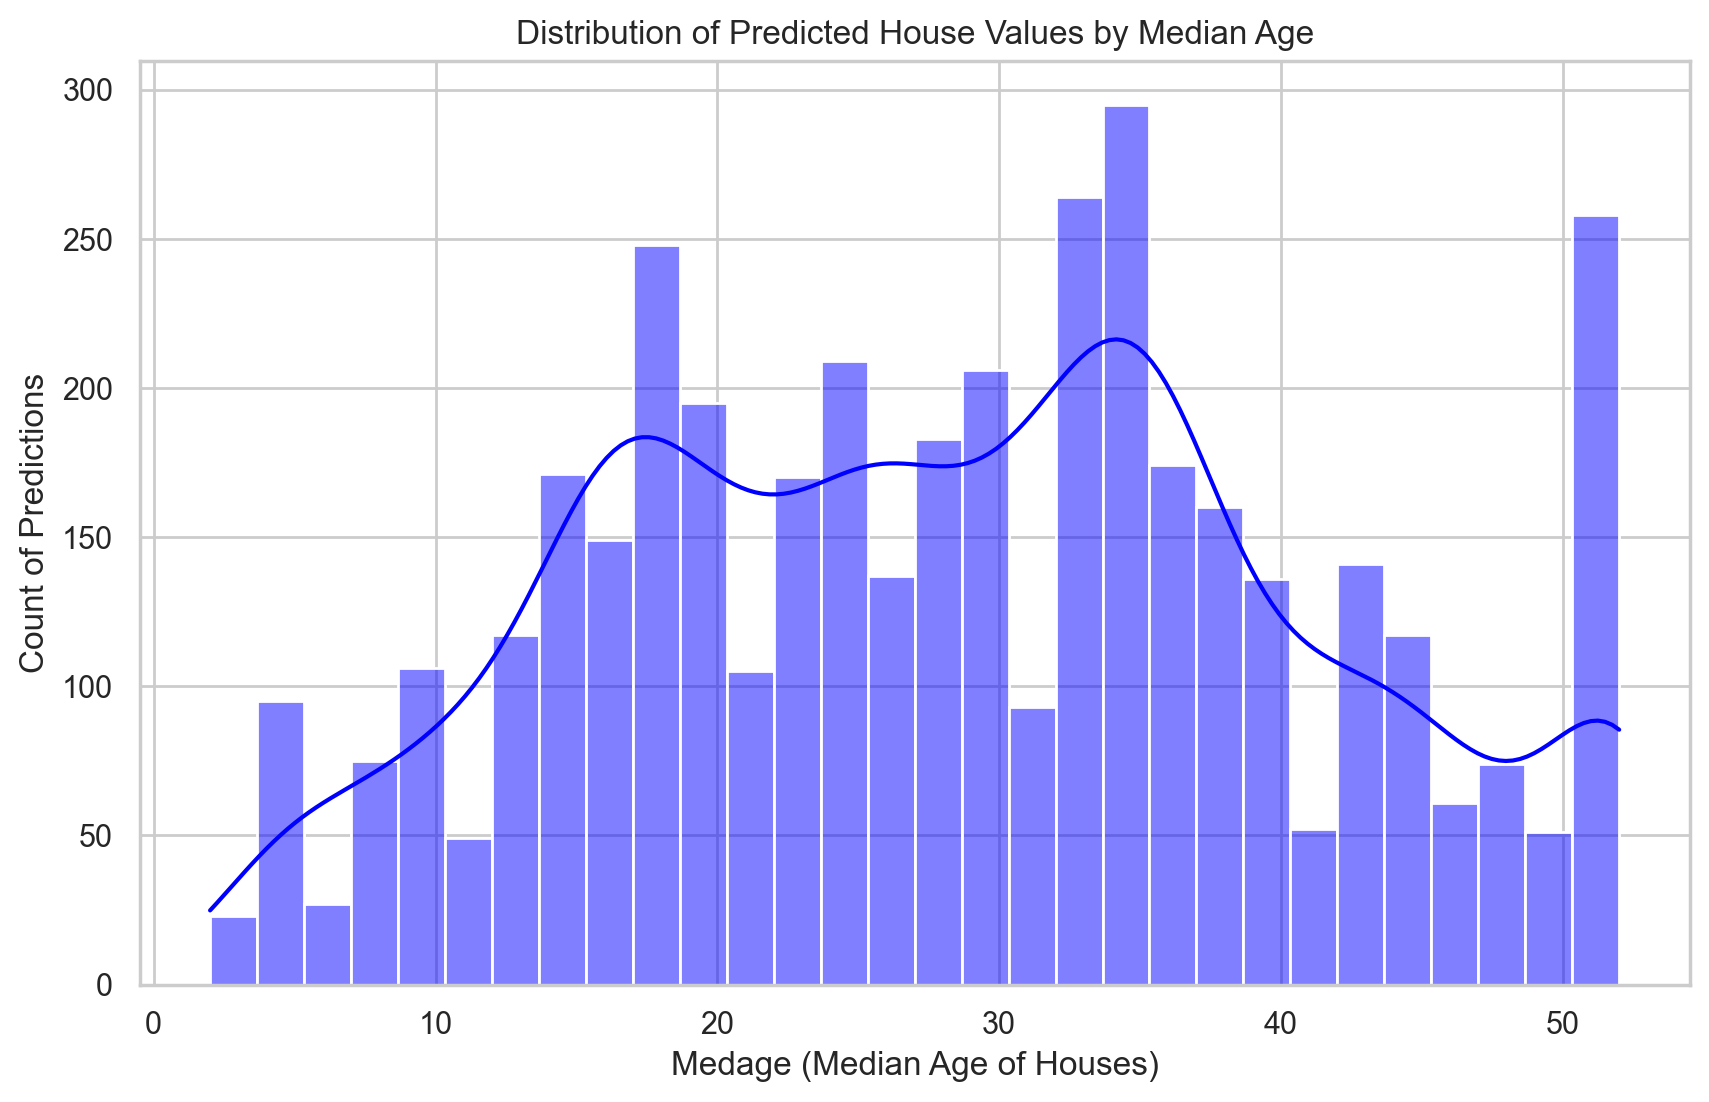

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to Pandas for easier plotting (if using PySpark DataFrame)
pred_pandas_df = predandlabels.toPandas()

# Plot count of predictions by medage
plt.figure(figsize=(10, 6))
sns.histplot(pred_pandas_df, x="medage", bins=30, kde=True, color="blue")

# Labels
plt.xlabel("Medage (Median Age of Houses)")
plt.ylabel("Count of Predictions")
plt.title("Distribution of Predicted House Values by Median Age")

# Show plot
plt.show()

### Explanation:
sns.histplot() → Creates a histogram to show the count of predictions for each medage.<br>
bins=30 → Adjusts the number of bars for better clarity.<br>
kde=True → Adds a smooth curve to see the distribution shape.<br>

## Exercise 3

Please consider the attached insurance.csv file. In this file, you have 4 numerical columns, age, bmi, no of children and charges. And other 3 columns, sex, smoker and region are String data.

Our target is to get a regressed insurance charges based on the given data in the insurance.csv file. Please use three numerical columns, age, bmi and no of children as features to generate the regression model. Perform the evaluation with different metrics to find out the accuracy of the model in generating regressed line to predict the insurance charge in future with new data.

LinearRegression()

Root Mean Squared Error (RMSE): 11454.315153980095
Mean Absolute Error (MAE): 9181.311632897381
R² Score: 0.15489592484270776


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='charges'>

Text(0.5, 0, 'Actual Charges')

Text(0, 0.5, 'Predicted Charges')

Text(0.5, 1.0, 'Actual vs. Predicted Insurance Charges')

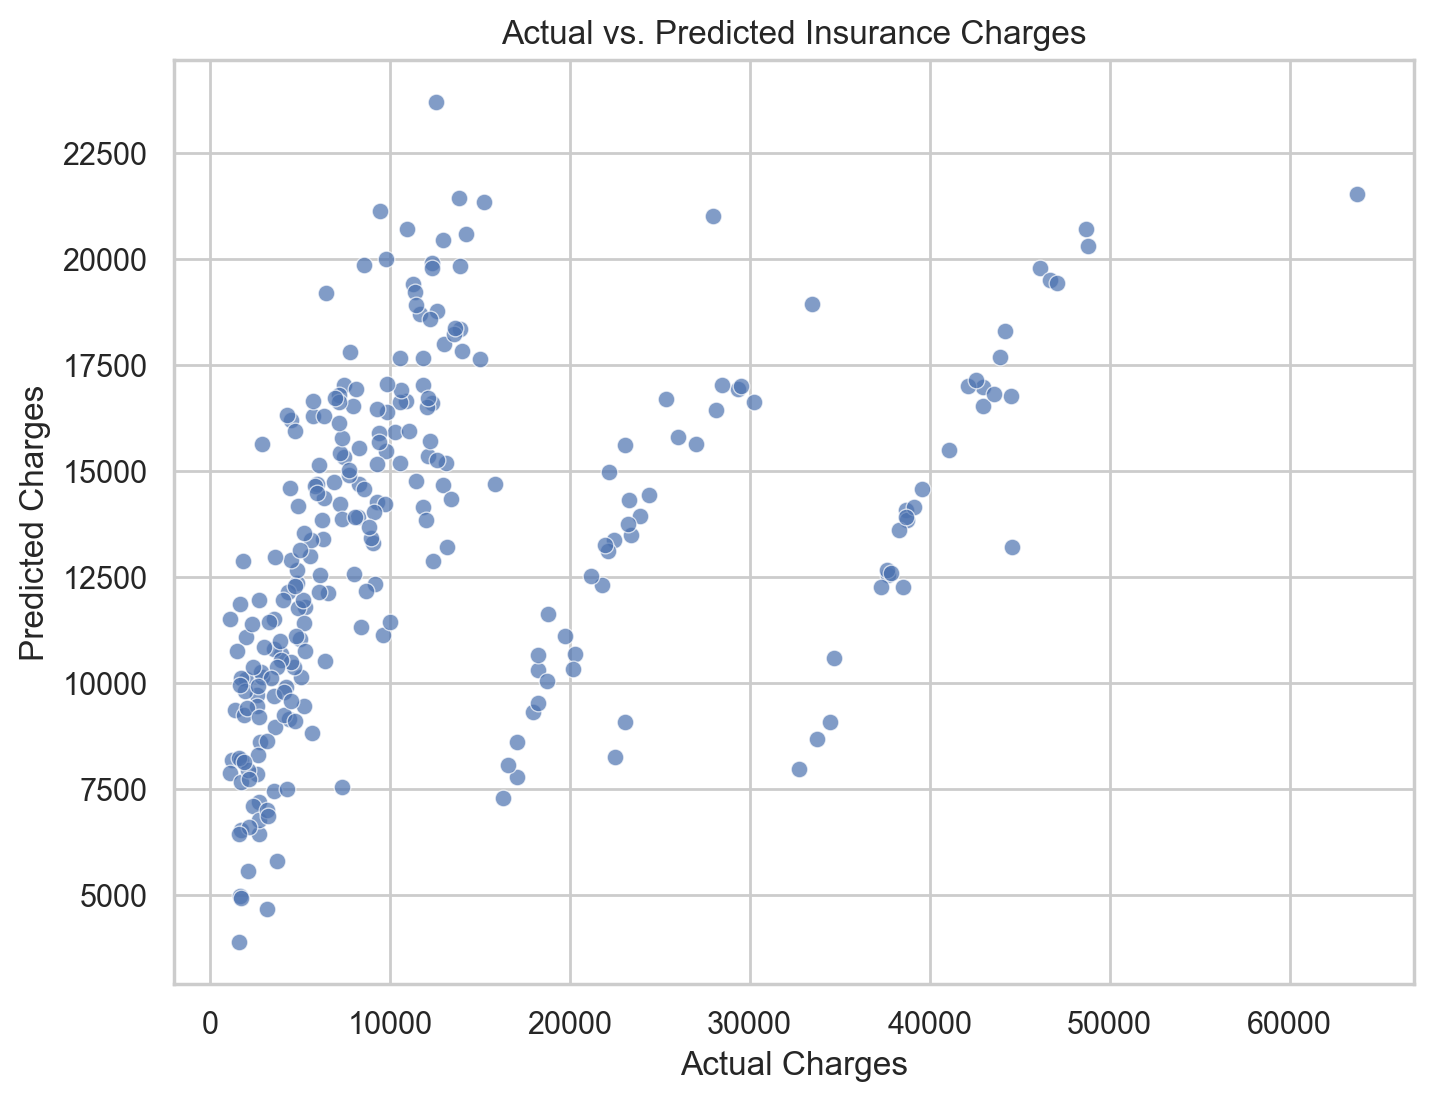

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv("insurance.csv")

# Select numerical features and target
X = df[["age", "bmi", "children"]]  # Features
y = df["charges"]  # Target

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Visualizing Predictions vs Actual Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.show()

## Label Encoding

As ML models can not work with string values directly, we need to encode the String values to a numerical ones. The are various encoders present to encode the string literals and values present in a dataset. Among them, one is one-hot encoding. One-hot encoding (OHE) is a machine learning technique that converts categorical data into numerical values. It's used to improve predictions by creating new binary columns for each category in a feature

Among the various columns present in our insurance dataset, 3 String values columns are sex, smoker and region. We can encode these three columns with One-Hot encoding, in the following way:

In [35]:
categorial_columns =['sex', 'smoker', 'region']
df_encoded = pd.get_dummies(dataFrame, prefix='One', prefix_sep='_',
                            columns=categorial_columns, dtype='int8', drop_first=True)

NameError: name 'dataFrame' is not defined

## Exercise 4

Print the encoded dataframe and check how many columns now the dataframe has. Please list the number of columns difference between the old dataframe and new dataframe. Please explain what types of change you see with the new dataframe.

In [36]:
import pandas as pd

# Load dataset
df = pd.read_csv("insurance.csv")

# Print original number of columns
print(f"Original DataFrame Columns: {df.shape[1]}")

# Define categorical columns
categorical_columns = ["sex", "smoker", "region"]

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, drop_first=True, dtype="int8")

# Print new number of columns after encoding
print(f"Encoded DataFrame Columns: {df_encoded.shape[1]}")

# Calculate column difference
column_difference = df_encoded.shape[1] - df.shape[1]
print(f"Number of Additional Columns After Encoding: {column_difference}")

# Display first few rows of new DataFrame
print(df_encoded.head())

Original DataFrame Columns: 7
Encoded DataFrame Columns: 9
Number of Additional Columns After Encoding: 2
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


## Exercise 5

Please consider all the columns present in insurance.csv file to regress the charges values. Keep the numerical columns unchanged and encode the columns with String values with One-Hot encoding. Perform Linear Regression on the dataset and check whether the accuracy of prediction/regression analytical results for charges has increased or not.

For accuracy comparison used the evaluation metrics provided in this tutorial.

LinearRegression()

Root Mean Squared Error (RMSE): 5796.28
Mean Absolute Error (MAE): 4181.19
R² Score: 0.78


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='charges'>

Text(0.5, 0, 'Actual Charges')

Text(0, 0.5, 'Predicted Charges')

Text(0.5, 1.0, 'Actual vs. Predicted Insurance Charges')

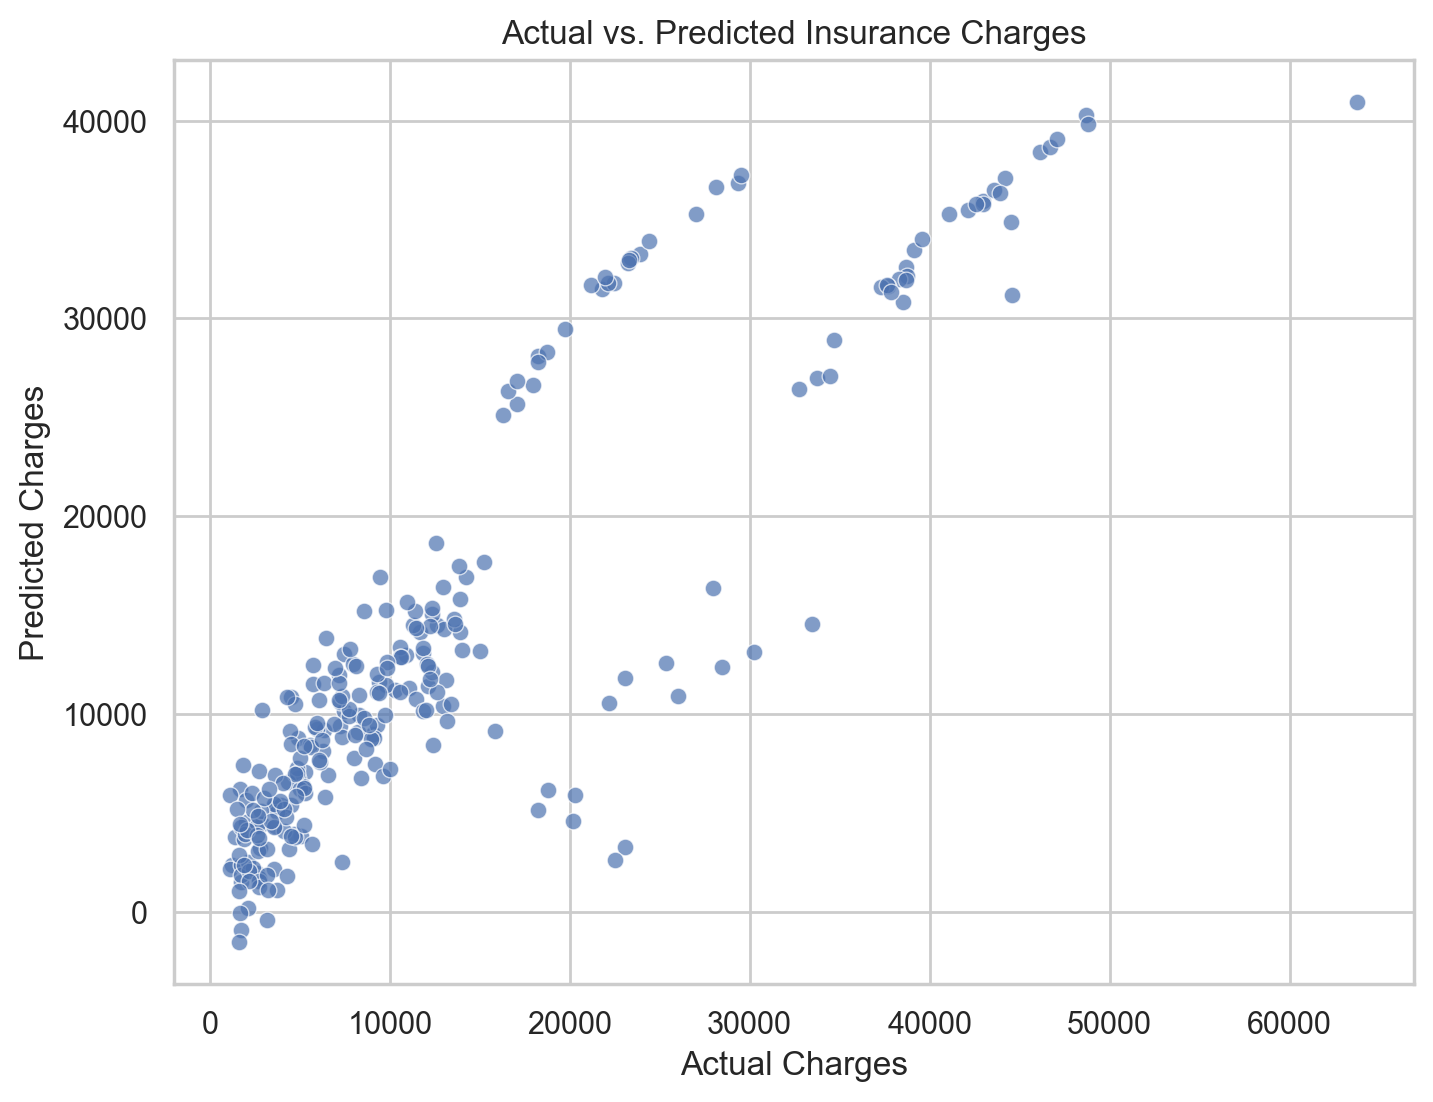

In [37]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv("insurance.csv")

# Encode categorical variables with One-Hot Encoding
categorical_columns = ["sex", "smoker", "region"]
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype="int8")

# Select features (all columns except 'charges') and target variable
X = df_encoded.drop(columns=["charges"])
y = df_encoded["charges"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualizing Actual vs. Predicted Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.show()